<a href="https://colab.research.google.com/github/CAkoth7/RandomForest/blob/main/network_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv to Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [5]:
import pandas as pd

# Load CSV
df = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')

# Show first rows
df.head()


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,389,113095465,48,24,9668,10012,403,0,201.416667,203.548293,...,32,203985.500,5.758373e+05,1629110,379,13800000.0,4.277541e+06,16500000,6737603,BENIGN
1,389,113473706,68,40,11364,12718,403,0,167.117647,171.919413,...,32,178326.875,5.034269e+05,1424245,325,13800000.0,4.229413e+06,16500000,6945512,BENIGN
2,0,119945515,150,0,0,0,0,0,0.000000,0.000000,...,0,6909777.333,1.170000e+07,20400000,6,24400000.0,2.430000e+07,60100000,5702188,BENIGN
3,443,60261928,9,7,2330,4221,1093,0,258.888889,409.702161,...,20,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,53,269,2,2,102,322,51,51,51.000000,0.000000,...,32,0.000,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [6]:
print(df.columns.tolist())


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [7]:
target_column = ' Label'  # e.g., 'class', 'Attack_type', etc.

X = df.drop(columns=[target_column])
y = df[target_column]


In [8]:
# Modified my column by removing whitespace

df.rename(columns={' Label': 'Label'}, inplace=True)


In [9]:
# train-test split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Label'])  # Features
y = df['Label']                 # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Create and train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [10]:
import numpy as np

# Check for infinite values
print(np.isinf(X).sum().sum())


250


In [11]:
# Replace inf/-inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop or fill missing values
X.dropna(inplace=True)


In [12]:
# Replace inf/-inf with NaN
y.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop or fill missing values
y.dropna(inplace=True)

In [13]:
# Re-align target with cleaned features
y = y.loc[X.index]

# Split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [15]:
from sklearn.ensemble import RandomForestClassifier # import the necessary class

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = clf.predict(X_test)


In [17]:
y_proba = clf.predict_proba(X_test)[:, 1]  # binary classification


In [18]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9956921871940474
Classification Report:
                             precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00     50405
  Web Attack � Brute Force       0.77      0.81      0.79       470
Web Attack � Sql Injection       1.00      0.25      0.40         8
          Web Attack � XSS       0.42      0.33      0.37       187

                  accuracy                           1.00     51070
                 macro avg       0.80      0.60      0.64     51070
              weighted avg       1.00      1.00      1.00     51070



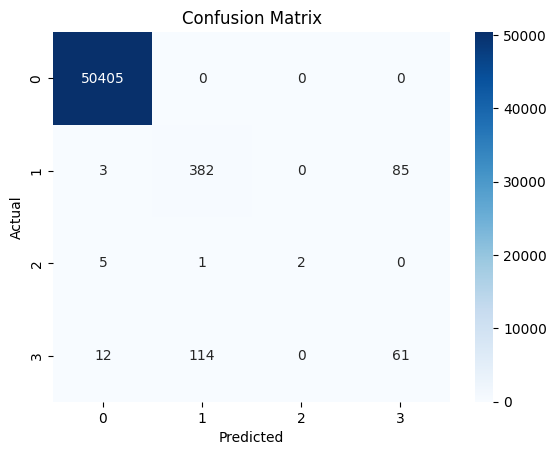

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
# imbalance handling (pays more attention to underrepresented classes)

from sklearn.utils import class_weight

# compute class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(zip(np.unique(y_train), weights))

# Re-train with weights

clf = RandomForestClassifier(n_estimators=100, class_weight=class_weights, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight={'BENIGN': np.float64(0.25321940397463577),
                                     'Web Attack � Brute Force': np.float64(28.727338476374157),
                                     'Web Attack � Sql Injection': np.float64(2291.5576923076924),
                                     'Web Attack � XSS': np.float64(64.06505376344086)},
                       random_state=42)

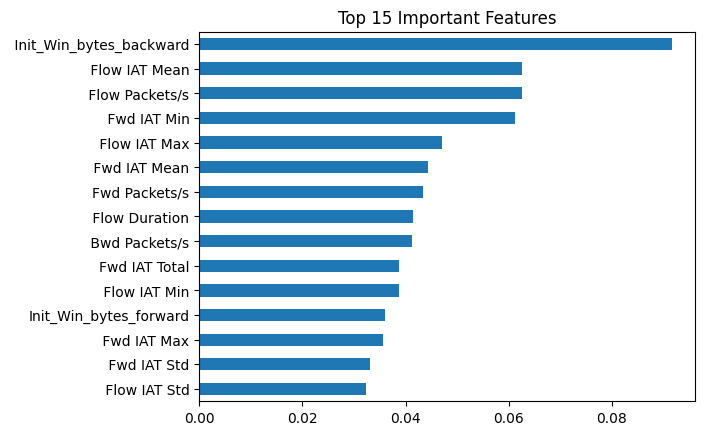

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = clf.feature_importances_
features = X_train.columns

# Plot top 15
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)[:15]
feat_importance.plot(kind='barh')
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [25]:
# using GridSearchCV to tune Random Forest

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)


Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
